### Deutsch-Jozsa and Grover's Algorithm

in Qiskit, using Aqua

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_ibm_runtime import Sampler, QiskitRuntimeService
from qiskit_aer import Aer
import numpy as np
from copy import deepcopy
from collections.abc import Callable
import matplotlib.pyplot as plt

from qiskit.circuit.library import PhaseOracleGate

%matplotlib inline

In [9]:
def truth_table_to_oracle(tt):
    n = (len(tt)).bit_length() - 1
    terms = []
    for idx, bit in enumerate(tt):
        if bit == '1':
            bin_str = format(idx, f'0{n}b')
            term = []
            for qubit, val in enumerate(bin_str[::-1]):  # reverse for x0 LSB
                term.append(f"{'' if val=='1' else '~'}x{qubit}")
            terms.append("(" + " & ".join(term) + ")")
    expr = " | ".join(terms) or "False"
    return PhaseOracle(expr)

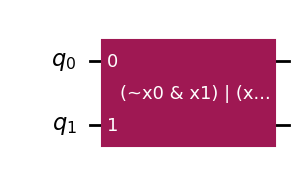

In [15]:
expr = "(~x0 & x1) | (x0 & x1)"
oracle = PhaseOracleGate(expression=expr)
# oracle = truth_table_to_oracle("0101")
qc = QuantumCircuit(2, name="qc")
qc.append(oracle, qc.qubits)
qc.draw(("mpl"));